### EXPLORATORY DATA ANALYSIS (EDA)

0. Define the objective of the analisis: “I want to analyze the factors that influence the price of automobiles.”


1. Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import datetime

2. Loading the data, creating a dataframe 


In [3]:
path = r"C:\Users\paula\Kaggle\CARS EDA\cars_data.csv" #change to the path where you have saved the csv file 
df = pd.read_csv(path)

3. Understanding Data Structure

In [4]:
# Dimensions
shape = df.shape #Return a tuple representing the dimensionality of the DataFrame.
size = df.size #return the number of rows times number of columns if DataFrame.
print(f'The shape of the dataframe is {shape} and the size {size}')

The shape of the dataframe is (11914, 16) and the size 190624


In [5]:
# First 10 rows of the dataframe
df.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [6]:
# Types of data
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [7]:
# Descriptive statistics
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


4. Dropping irrelevant columns (we don't want them for this analysis)

In [8]:
df = df.drop(['Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,28,18,34500


5. Column renaming for better compression

In [9]:
df = df.rename(columns={"Make":"Mark","Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Mark,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,28,18,34500


6. Search and treatment of duplicate columns

In [10]:
duplicates_total = df.duplicated().sum()
print(f"Number of duplicates: {duplicates_total}")

Number of duplicates: 918


In [11]:
# Or seeing it in a dataframe
duplicate_rows_df = df[df.duplicated()]
print(f'Number of duplicate rows and columns: {duplicate_rows_df.shape}')

Number of duplicate rows and columns: (918, 11)


In [12]:
# Count the number of rows
df.count()

Mark                11914
Model               11914
Year                11914
Engine Fuel Type    11911
HP                  11845
Cylinders           11884
Transmission        11914
Drive Mode          11914
MPG-H               11914
MPG-C               11914
Price               11914
dtype: int64

In [13]:
df = df.drop_duplicates()

In [14]:
df.count() # There is a difference between variables but the total number has decreased

Mark                10996
Model               10996
Year                10996
Engine Fuel Type    10993
HP                  10927
Cylinders           10966
Transmission        10996
Drive Mode          10996
MPG-H               10996
MPG-C               10996
Price               10996
dtype: int64

7. Detection and treatment of missing values

In [15]:
print(df.isnull().sum()) # This is the reason of the difference above some missing values

Mark                 0
Model                0
Year                 0
Engine Fuel Type     3
HP                  69
Cylinders           30
Transmission         0
Drive Mode           0
MPG-H                0
MPG-C                0
Price                0
dtype: int64


In [16]:
df = df.dropna()    # Dropping the missing values
df.count() # Now the size is the same 

Mark                10895
Model               10895
Year                10895
Engine Fuel Type    10895
HP                  10895
Cylinders           10895
Transmission        10895
Drive Mode          10895
MPG-H               10895
MPG-C               10895
Price               10895
dtype: int64

In [17]:
print(df.isnull().sum())   # Another way to see it 

Mark                0
Model               0
Year                0
Engine Fuel Type    0
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
MPG-H               0
MPG-C               0
Price               0
dtype: int64


8.  Outlier detection for all numerical columns

In [18]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns #Select the numercial columns
print(numerical_cols)

Index(['Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C', 'Price'], dtype='object')


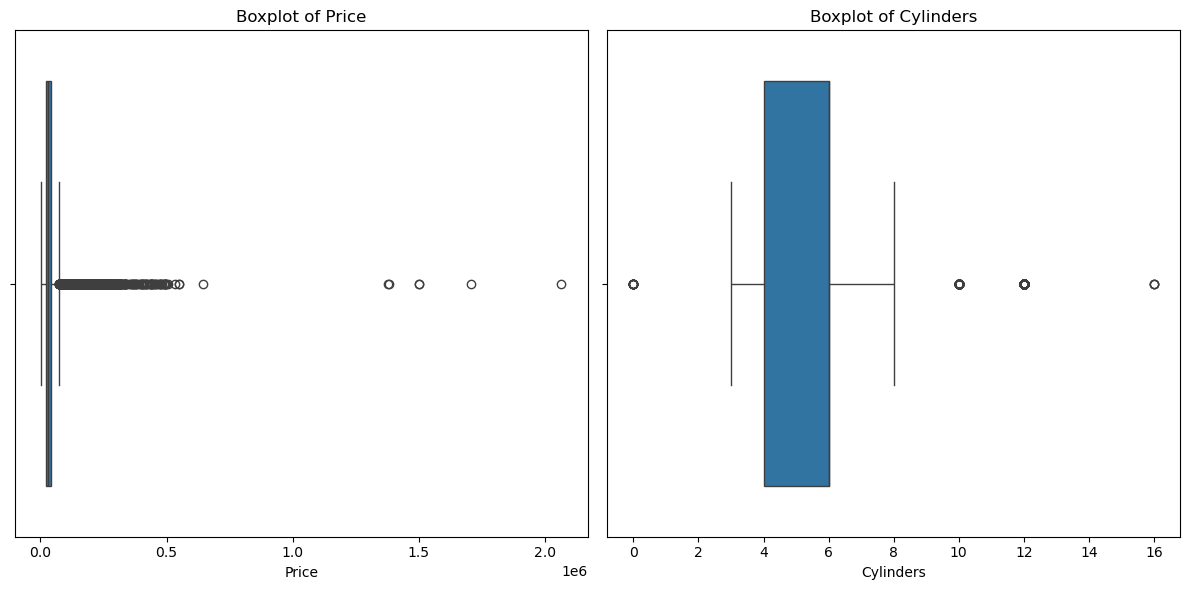

In [19]:
# Example of BoxPlots to detect outliers
# Create a figure with two subplots
plt.figure(figsize=(12, 6))  # Define the size of the overall figure

# First subplot for Price
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
sns.boxplot(x=df['Price'])  # Create a boxplot for the 'Price' column
plt.title('Boxplot of Price')  # Set the title for the first subplot
plt.xlabel('Price')  # Set the label for the x-axis of the first subplot

# Second subplot for Cylinders
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
sns.boxplot(x=df['Cylinders'])  # Create a boxplot for the 'Cylinders' column
plt.title('Boxplot of Cylinders')  # Set the title for the second subplot
plt.xlabel('Cylinders')  # Set the label for the x-axis of the second subplot

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Display both boxplots
plt.show()

In [20]:
for col in numerical_cols:
    # Calculation of quartiles and the IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper limits
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Display information about outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'Outliers detected in {col}: {outliers.shape[0]}')

    # Eliminate outliers (optional) (we do it in this case because they are few and in the case of price they affect a lot to its distribution)
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Verify DataFrame size after handling outliers
print(f'Dataset shape after removing outliers: {df.shape}')

Outliers detected in Year: 390
Outliers detected in HP: 502
Outliers detected in Cylinders: 60
Outliers detected in MPG-H: 114
Outliers detected in MPG-C: 145
Outliers detected in Price: 499
Dataset shape after removing outliers: (9185, 11)


8. Univariate Analysis for Price

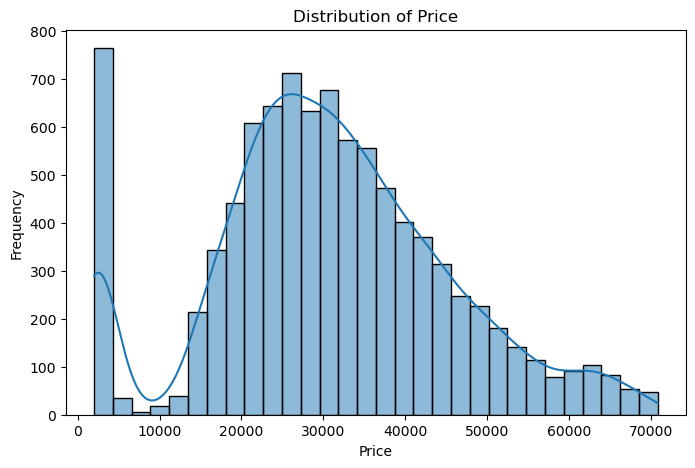

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [22]:
# Filtrar registros con Price cerca de 0
low_price = df[df['Price'] < 10000]  # Umbral definido como "cercano a 0"

# Mostrar el número de registros
print(f"Number of cars with Price < 1000: {low_price.shape[0]}")


Number of cars with Price < 1000: 808


In [23]:
# We delete those with a prices less than 10.000
df = df[df['Price'] >= 10000]
print(f"Dataset shape after removing low prices: {df.shape}")

low_price_cars = df[df['Price'] < 10000] # Save it as a variable in case you want to study them

Dataset shape after removing low prices: (8377, 11)


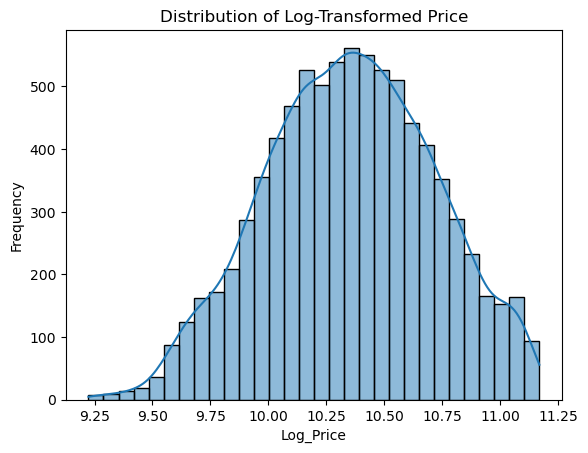

In [24]:
df['Log_Price'] = np.log1p(df['Price'])
sns.histplot(df['Log_Price'], kde=True, bins=30)
plt.title('Distribution of Log-Transformed Price')
plt.xlabel('Log_Price')
plt.ylabel('Frequency')
plt.show()

9. Bivariate analysis: Log_Price vs other variables

9.1 Year and Price

In [25]:
df['Year'].unique() # We see the years of the fabrication of the cars

# Current_Year variable
current_year = datetime.datetime.now().year

# Car_Age variable
df['Car_Age'] = current_year - df['Year']

# Correlation 
correlation = df[['Car_Age', 'Log_Price']].corr()
print("Correlation between Car Age and Log_Price:")
print(correlation)


Correlation between Car Age and Log_Price:
            Car_Age  Log_Price
Car_Age    1.000000  -0.335899
Log_Price -0.335899   1.000000


9.2 Mark and Price

In [26]:
# Select the top 20 more commons marks, because there is a lot of marks
top_brands = df['Mark'].value_counts().index[:20]
df_top_brands = df[df['Mark'].isin(top_brands)]

print("Top 20 car brands:")
print(df_top_brands['Mark'].value_counts())

Top 20 car brands:
Mark
Chevrolet     897
Ford          645
Toyota        567
Volkswagen    510
Nissan        465
GMC           425
Dodge         393
Honda         354
Mazda         317
Infiniti      311
Suzuki        301
Cadillac      280
Hyundai       236
Audi          219
Kia           209
Subaru        204
Acura         203
BMW           202
Volvo         187
Buick         166
Name: count, dtype: int64


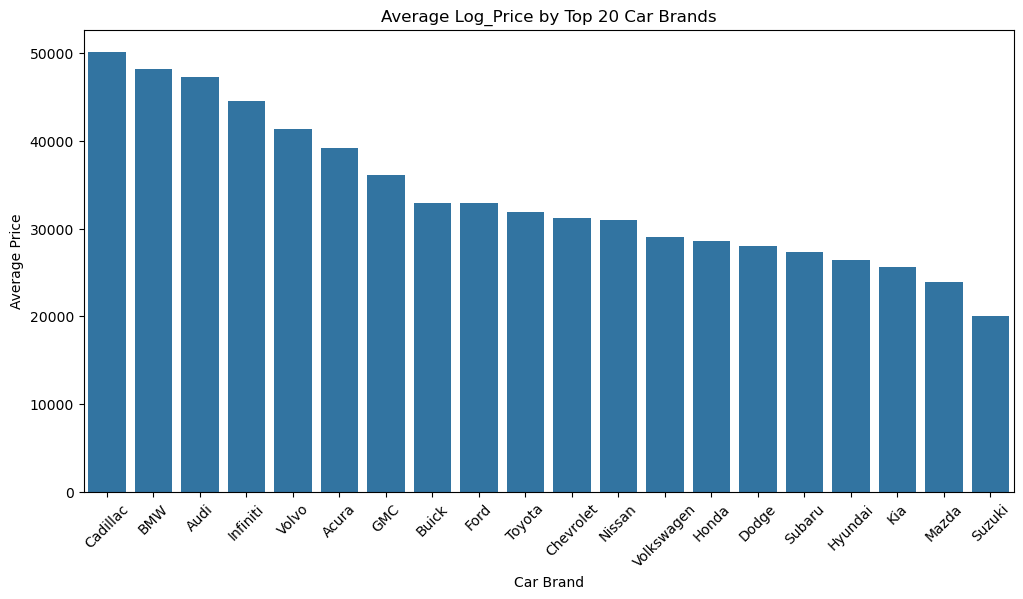

In [27]:
# Calculate the average Price for each brand
avg_price_by_brand = df_top_brands.groupby('Mark')['Price'].mean().sort_values(ascending=False)

# Plot the average Price for each mark
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_brand.index, y=avg_price_by_brand.values)
plt.title('Average Log_Price by Top 20 Car Brands')
plt.xlabel('Car Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  # Rotate brand names for readability
plt.show()

In [28]:
# Create a DataFrame with average Log_Price per brand
avg_price_df = df_top_brands.groupby('Mark')['Log_Price'].mean().reset_index()
avg_price_df['Mark_Encoded'] = range(len(avg_price_df))  # Encode brands as numbers

# Correlation between encoded Mark and Log_Price
correlation = avg_price_df[['Mark_Encoded', 'Log_Price']].corr()
print("Correlation between encoded Mark and Log_Price:")
print(correlation)

Correlation between encoded Mark and Log_Price:
              Mark_Encoded  Log_Price
Mark_Encoded      1.000000  -0.492932
Log_Price        -0.492932   1.000000


9.3 Transmission and Price

In [29]:
df['Transmission'].value_counts()

Transmission
AUTOMATIC           6516
MANUAL              1548
AUTOMATED_MANUAL     313
Name: count, dtype: int64

In [30]:
# Replace 'AUTOMATED_MANUAL' with 'AUTOMATIC' (so we only have to categories)
df['Transmission'] = df['Transmission'].replace('AUTOMATED_MANUAL', 'AUTOMATIC')

# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=['Transmission'], drop_first=True)
 
# With drop_first=True, the first category (AUTOMATIC) is dropped to avoid multicollinearity, leaving a single column (Transmission_MANUAL).

In [31]:
# Rename the column
df = df.rename(columns = {'Transmission_MANUAL':'Manual'})

# Display the resulting dataframe
df.head() 


,Mark,Model,Year,Engine Fuel Type,HP,Cylinders,Drive Mode,MPG-H,MPG-C,Price,Log_Price,Car_Age,Manual
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,rear wheel drive,26,19,46135,10.739349,14,True
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,rear wheel drive,28,19,40650,10.612779,14,True
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,rear wheel drive,28,20,36350,10.500977,14,True
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,rear wheel drive,28,18,29450,10.290483,14,True
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,rear wheel drive,28,18,34500,10.448744,14,True


In [33]:
# Correlation between Manual and Log_Price
correlation = df[['Manual', 'Log_Price']].corr()
print("Correlation between Manual and Log_Price:")
print(correlation)

Correlation between Manual and Log_Price:
             Manual  Log_Price
Manual     1.000000  -0.329568
Log_Price -0.329568   1.000000


In [34]:
summary_stats = df.groupby('Manual')['Log_Price'].describe()
print("Summary statistics for Log_Price by Transmission Type:")
summary_stats

Summary statistics for Log_Price by Transmission Type:


,count,mean,std,min,25%,50%,75%,max
Manual,,,,,,,,
False,6829.0,10.409585,0.332319,9.301095,10.173362,10.407923,10.647114,11.168334
True,1548.0,10.098521,0.400432,9.223849,9.809177,10.025749,10.322149,11.166922


10. Multivariable analysis

10.1 Numerical features and price

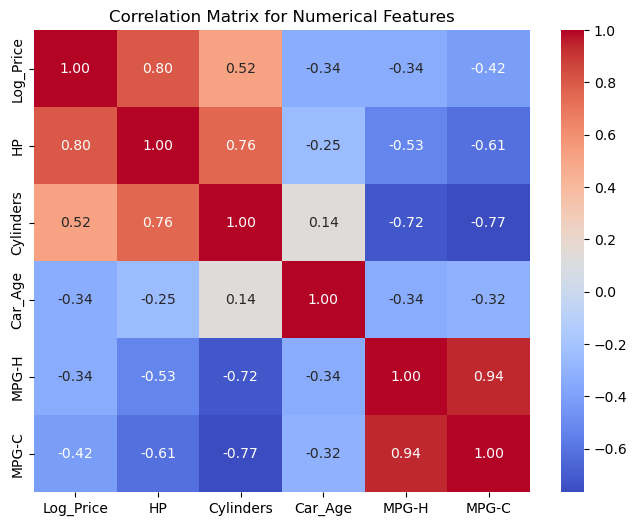

In [35]:
# Correlation matrix for numerical features
numerical_features = ['Log_Price', 'HP', 'Cylinders', 'Car_Age', 'MPG-H', 'MPG-C']
corr_matrix = df[numerical_features].corr()

# Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Features')
plt.show()

10.2 Multivariate Analysis: Log_Price vs Mark and Model

In [36]:
# Group by Mark and Model, then calculate average Log_Price
avg_price_by_mark_model = df.groupby(['Mark', 'Model'])['Log_Price'].mean().reset_index()

# Sort by Log_Price for better visualization
avg_price_by_mark_model = avg_price_by_mark_model.sort_values(by='Log_Price', ascending=False)

# Display the top 10 most expensive Mark-Model combinations
print(avg_price_by_mark_model.head(10))

              Mark            Model  Log_Price
368       Maserati           Ghibli  11.159102
24            Audi             RS 5  11.145480
403  Mercedes-Benz        GLS-Class  11.137519
19            Audi               A7  11.135482
395  Mercedes-Benz        CLS-Class  11.122589
401  Mercedes-Benz  GLE-Class Coupe  11.117474
366          Lotus            Evora  11.115309
351          Lexus           SC 430  11.115184
367          Lotus            Exige  11.111268
340          Lexus           LX 470  11.107432


10.3 Multivariate Analysis: Log_Price vs Transmission and Car_Age

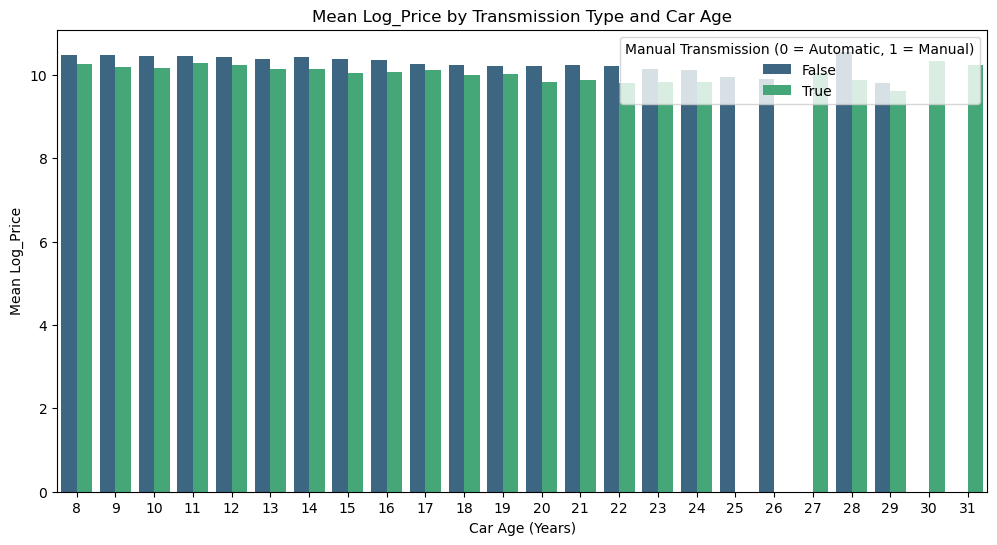

In [41]:
# Group by 'Manual' and 'Car_Age' and calculate mean and median Log_Price
summary = df.groupby(['Manual', 'Car_Age'])['Log_Price'].agg(['mean', 'median']).reset_index()

# Print the summary
summary

plt.figure(figsize=(12, 6))

# Bar plot for mean Log_Price by Transmission and Car_Age
sns.barplot(data=summary, x='Car_Age', y='mean', hue='Manual', palette='viridis')
plt.title('Mean Log_Price by Transmission Type and Car Age')
plt.xlabel('Car Age (Years)')
plt.ylabel('Mean Log_Price')
plt.legend(title='Manual Transmission (0 = Automatic, 1 = Manual)')
plt.show()

11. EXTRA: Regression Analysis

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Select key features for regression
X = df[['Car_Age', 'HP', 'Manual','MPG-H', 'MPG-C','Cylinders']]  # Add more variables as needed
y = df['Log_Price']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("R-squared score:", r2_score(y_test, y_pred))

# Display coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

R-squared score: 0.687943489328982
     Feature  Coefficient
0    Car_Age    -0.004945
1         HP     0.004267
2     Manual    -0.163649
3      MPG-H     0.003064
4      MPG-C    -0.004421
5  Cylinders    -0.050343


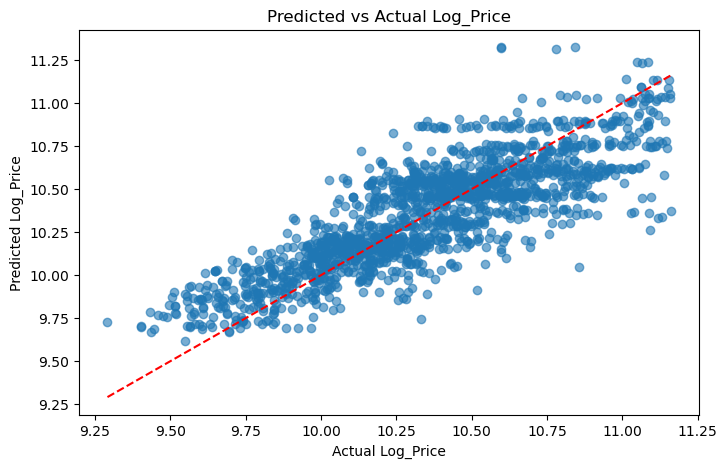

In [43]:
# Predicted vs Actual Log_Price
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.title('Predicted vs Actual Log_Price')
plt.xlabel('Actual Log_Price')
plt.ylabel('Predicted Log_Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()